<a href="https://colab.research.google.com/github/derekbomfimprates/CarInsuranceClaimPrediction/blob/main/Insurance_Claims_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Claims Analysis

**Project Overview:**
- Importance of Preprocessing in Machine Learning for Insurance Claims Analysis

**Key Objective:**
- The goal of this project is to build a machine learning model that performs insurance claims analysis. This will involve comparing model performance before and after implementing essential preprocessing steps. By conducting this analysis, I want to demonstrate the critical role that data preprocessing plays in the accuracy and effectiveness of machine learning models.

# Import Section

In this section, I will import the necessary libraries, including Pandas for data manipulation, NumPy for numerical operations, and other libraries for building and evaluating machine learning models

In [1]:
# Import Section
# The following libraries are used for data manipulation, visualization, and machine learning model building.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer


# Data Loading Section

In this section, I will import the dataset (in .csv format) and use Pandas to manipulate it.

## Data Loading Section
The dataset is from [Kaggle's Car Insurance Claim Prediction](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification/data).


In [2]:
# Mounting to google driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the training dataset
train_data = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')

# Load the test dataset
test_data = pd.read_csv('/content/drive/MyDrive/datasets/test.csv')

# Load the sample submission (to check structure of predictions)
sample_submission = pd.read_csv('/content/drive/MyDrive/datasets/sample_submission.csv')



**Sample Submission**

It is a file provided as a template of final predictions' format.

In [4]:
sample_submission.head()

,policy_id,is_claim
0,ID58593,1
1,ID58594,1
2,ID58595,1
3,ID58596,1
4,ID58597,1


In [5]:
# Display the shape of sample dataset
test_data.shape

(39063, 43)

In [6]:
# Display the first 5 rows of the test dataset
test_data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


In [7]:
# Display the shape of test dataset
test_data.shape

(39063, 43)

In [8]:
# Display the main statistics, standard deviation, and distribution of the features in the train dataset
test_data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000
mean,0.611304,0.069635,0.469087,18816.232496,1.763382,3.139672,1160.605842,3.620613,5.245782,4.853222,3849.328981,1671.774979,1553.033203,1384.501677,1.759235
std,0.415005,0.056854,0.122072,17651.942351,1.134112,1.831043,266.942754,0.485241,0.430556,0.228060,312.181174,111.973404,79.030425,212.724627,1.386689
min,0.002745,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000
25%,0.208958,0.020000,0.375000,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000
50%,0.574078,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000
75%,1.040936,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000
max,1.391398,1.000000,0.990385,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000


In [9]:
# Display information about the features in the test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

In [10]:
# Display the first 5 rows of the test dataset
train_data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [11]:
# Display the shape of train dataset
train_data.shape

(58592, 44)

In [12]:
# Display the main statistics, standard deviation, and distribution of the features in the train dataset
train_data.describe()


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [13]:
# Display information about the features in the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [14]:
# Check for missing values in the test and train datasets
print("Missing values in test dataset:")
print(test_data.isnull().sum().sum())

print("\nMissing values in train dataset:")
print(train_data.isnull().sum().sum())

# Check for duplicated records in the test and train datasets
print("\nDuplicated records in test dataset:", test_data.duplicated().sum().sum())
print("Duplicated records in train dataset:", train_data.duplicated().sum().sum())


Missing values in test dataset:
0

Missing values in train dataset:
0

Duplicated records in test dataset: 0
Duplicated records in train dataset: 0


In [15]:
# I want to ensure that all features of the Object type are converted to numeric values to improve the analysis process.
le = LabelEncoder()
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        train_data[i] = le.fit_transform(train_data[i])
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  int64  
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  int64  
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  int64  
 8   model                             58592 non-null  int64  
 9   fuel_type                         58592 non-null  int64  
 10  max_torque                        58592 non-null  int64  
 11  max_power                         58592 non-null  int64  
 12  engi

In [16]:
# I want to ensure that all features of the Object type are converted to numeric values to improve the analysis process. (train dataset)
le = LabelEncoder()
for i in test_data.columns:
    if test_data[i].dtype == 'object':
        test_data[i] = le.fit_transform(test_data[i])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  int64  
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  int64  
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  int64  
 8   model                             39063 non-null  int64  
 9   fuel_type                         39063 non-null  int64  
 10  max_torque                        39063 non-null  int64  
 11  max_power                         39063 non-null  int64  
 12  engi

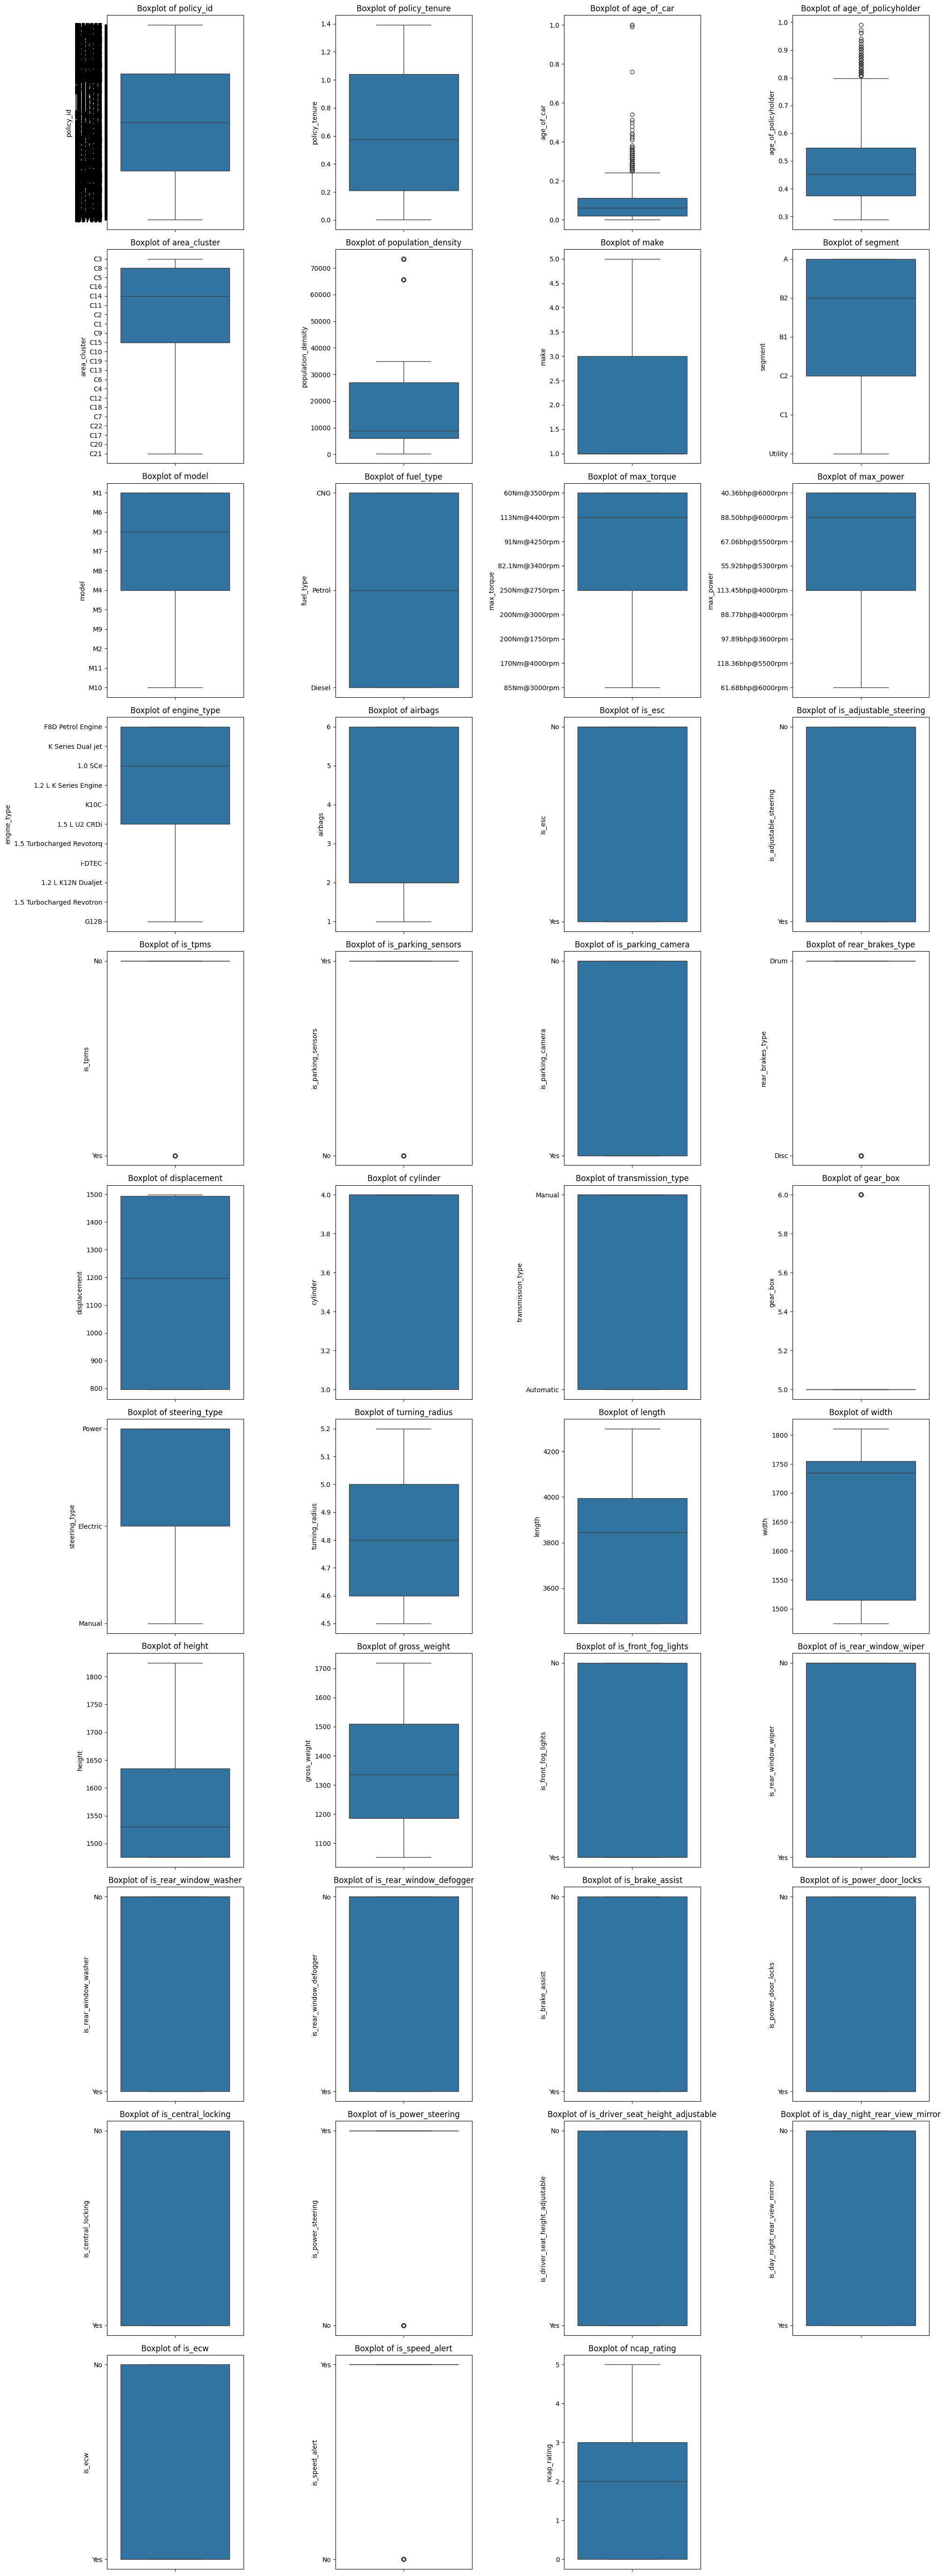

In [29]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Boxplots for each feature in the cleaned dataset

# Number of columns per row
cols = 4

# Create subplots
num_plots = len(test_data.columns) # Number of columns
rows = np.ceil(num_plots / cols).astype(int)  # Number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))  # figure size
axes = axes.flatten()  # Flatten the 2D array of axes to make iteration easier

# Loop through each feature and create a boxplot
for i, col in enumerate(test_data.columns):
    sns.boxplot(data = test_data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

In [19]:
# It is good practice to check the correlation between features. The .corr method provides a table (matrix) that shows the pairwise correlation coefficients between all numerical features in the DataFrame.
train_data.corr()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
policy_id,1.000000,0.000369,0.002214,0.003494,-0.000769,-0.005639,0.001908,0.005690,0.002067,0.001247,...,0.005110,0.003941,0.003941,0.000799,0.004990,-0.000597,0.003941,0.004088,0.003064,-0.002960
policy_tenure,0.000369,1.000000,0.166312,0.143676,0.035666,-0.100307,0.086101,0.172310,0.200052,0.183302,...,0.184687,0.229307,0.229307,0.012695,0.191328,0.116186,0.229307,-0.010318,0.173280,0.078747
age_of_car,0.002214,0.166312,1.000000,-0.035427,0.049342,-0.062255,0.188122,0.360144,0.365221,0.341563,...,0.350568,0.435211,0.435211,-0.018853,0.357716,0.194007,0.435211,-0.046551,0.348853,-0.028172
age_of_policyholder,0.003494,0.143676,-0.035427,1.000000,0.008967,0.009669,-0.031989,-0.022912,-0.049087,0.010322,...,0.025025,-0.038864,-0.038864,0.024265,0.010981,0.003207,-0.038864,0.001643,-0.031628,0.022435
area_cluster,-0.000769,0.035666,0.049342,0.008967,1.000000,-0.315874,0.028358,0.066277,0.057495,0.050661,...,0.068032,0.071584,0.071584,-0.000051,0.064862,0.019886,0.071584,-0.007578,0.059964,0.009425
population_density,-0.005639,-0.100307,-0.062255,0.009669,-0.315874,1.000000,-0.035125,-0.088443,-0.082640,-0.072647,...,-0.091824,-0.096469,-0.096469,0.001306,-0.091361,-0.038308,-0.096469,-0.004316,-0.071150,-0.017808
make,0.001908,0.086101,0.188122,-0.031989,0.028358,-0.035125,1.000000,0.609678,0.266116,0.059457,...,0.137287,0.414478,0.414478,0.097500,0.347099,-0.191371,0.414478,-0.155295,0.792254,-0.000456
segment,0.005690,0.172310,0.360144,-0.022912,0.066277,-0.088443,0.609678,1.000000,0.440043,0.354273,...,0.688792,0.616333,0.616333,-0.283698,0.745263,-0.004148,0.616333,-0.053501,0.666754,0.006366
model,0.002067,0.200052,0.365221,-0.049087,0.057495,-0.082640,0.266116,0.440043,1.000000,0.598950,...,0.472969,0.884738,0.884738,0.166121,0.599997,0.549804,0.884738,0.065668,0.612275,0.006548
fuel_type,0.001247,0.183302,0.341563,0.010322,0.050661,-0.072647,0.059457,0.354273,0.598950,1.000000,...,0.741303,0.741440,0.741440,0.174413,0.748370,0.845855,0.741440,-0.094221,0.405514,0.009612


In [20]:
# correlation for test dataset
test_data.corr()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
policy_id,1.000000,-0.010781,-0.004918,-0.002858,-0.002526,0.003813,-0.002162,-0.006405,0.001907,-0.000239,...,-0.003828,-0.003935,-0.000441,-0.000441,0.004997,-0.002768,0.003576,-0.000441,0.008339,-0.003285
policy_tenure,-0.010781,1.000000,0.167277,0.146140,0.036529,-0.101565,0.082356,0.177406,0.207844,0.194207,...,0.102509,0.189403,0.235065,0.235065,0.003003,0.197644,0.131231,0.235065,-0.000258,0.175686
age_of_car,-0.004918,0.167277,1.000000,-0.034012,0.048332,-0.067990,0.188491,0.355978,0.370046,0.344020,...,0.224046,0.350533,0.441291,0.441291,-0.007556,0.357422,0.197208,0.441291,-0.041930,0.351850
age_of_policyholder,-0.002858,0.146140,-0.034012,1.000000,0.019789,0.010307,-0.036057,-0.021408,-0.052971,0.013089,...,-0.030937,0.025717,-0.041464,-0.041464,0.016423,0.011819,0.008111,-0.041464,0.003989,-0.035773
area_cluster,-0.002526,0.036529,0.048332,0.019789,1.000000,-0.319486,0.032541,0.065406,0.055090,0.054753,...,0.038971,0.069035,0.069408,0.069408,0.003560,0.069340,0.025806,0.069408,-0.015379,0.060874
population_density,0.003813,-0.101565,-0.067990,0.010307,-0.319486,1.000000,-0.043839,-0.084624,-0.083307,-0.078593,...,-0.059882,-0.091930,-0.098461,-0.098461,-0.014916,-0.096531,-0.046375,-0.098461,0.000869,-0.078531
make,-0.002162,0.082356,0.188491,-0.036057,0.032541,-0.043839,1.000000,0.616468,0.263949,0.065087,...,0.690867,0.143791,0.415165,0.415165,0.092565,0.351547,-0.187860,0.415165,-0.153755,0.792000
segment,-0.006405,0.177406,0.355978,-0.021408,0.065406,-0.084624,0.616468,1.000000,0.445422,0.360997,...,0.758887,0.700407,0.624715,0.624715,-0.270324,0.756663,-0.001760,0.624715,-0.053660,0.675761
model,0.001907,0.207844,0.370046,-0.052971,0.055090,-0.083307,0.263949,0.445422,1.000000,0.590179,...,0.257224,0.467013,0.884276,0.884276,0.157107,0.591978,0.542143,0.884276,0.064724,0.612726
fuel_type,-0.000239,0.194207,0.344020,0.013089,0.054753,-0.078593,0.065087,0.360997,0.590179,1.000000,...,0.187383,0.737350,0.737190,0.737190,0.164363,0.744309,0.846023,0.737190,-0.093499,0.405145


In [21]:
# Show how each feature in the dataset correlates with the "is_claim" target variable.
cor_train = train_data.corr()
abs(cor_train['is_claim'])

,is_claim
policy_id,0.002960
policy_tenure,0.078747
age_of_car,0.028172
age_of_policyholder,0.022435
area_cluster,0.009425
population_density,0.017808
make,0.000456
segment,0.006366
model,0.006548
fuel_type,0.009612


- Features with very **low correlation**: Features like make, segment, model, fuel_type, have very low correlation values (near 0), meaning they don’t have a strong linear relationship with is_claim. However, low correlation doesn't always mean a feature is not useful.

- Features with **moderate correlation**: policy_tenure has the highest correlation with is_claim (0.078747), though it's still not a very strong correlation. This means it might slightly influence whether a claim is made or not, but not very much.

**Candidates for dropping**:

- Features with **near-zero correlation** like make, segment, model, fuel_type, max_torque, is_tpms, etc. These are unlikely to provide much value.

# **First: Only 2 Preprocessing Steps**

In this section, we will perform only 2 basics preprocessing steps:

- **Handling Missing Values:** We will check for any missing data and decide whether to fill them with appropriate values or drop the affected rows/columns.**(No missing values were found)**

- **Encoding Categorical Variables:** Since our dataset may contain categorical features, we will apply techniques such as one-hot encoding or label encoding to convert these into numerical format, allowing the model to interpret them effectively.

We will use the results to evaluate how the inclusion of preprocessing affects the model's performance. This will allow us to compare the baseline results against those obtained after applying various preprocessing techniques.

In [22]:
# Check if the columns in both datasets are the same
if list(train_data.columns) == list(test_data.columns):
    print("Both train and test datasets have the same columns.")
else:
    print("The train and test datasets have different columns.")

# Optionally, you can display the differences:
train_cols = set(train_data.columns)
test_cols = set(test_data.columns)

print("Columns in train but not in test:", train_cols - test_cols)
print("Columns in test but not in train:", test_cols - train_cols)


The train and test datasets have different columns.
Columns in train but not in test: {'is_claim'}
Columns in test but not in train: set()


In [23]:
# Select numeric columns for further processing
x = train_data.drop(columns='is_claim')  # Features
y = train_data['is_claim']  # Target variable

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize classifiers
RFC = RandomForestClassifier(n_estimators=135, max_depth=9, max_leaf_nodes=27, random_state=42)
GBC = GradientBoostingClassifier(n_estimators=230, random_state=42)
XGBC = XGBClassifier(n_estimators=110, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
LR = LogisticRegression(max_iter=30000, random_state=42)

# Create a VotingClassifier with soft voting
estimators = [('lr', LR), ('gbc', GBC), ('xgbc', XGBC), ('rfc', RFC)]
VC = VotingClassifier(estimators=estimators, voting='soft')

# Create a pipeline with the VotingClassifier
model = Pipeline(steps=[
    # Polynomial features are optional, you can add them back if needed
    # ('poly_features', PolynomialFeatures(degree=2)),  # Uncomment if you want to add PolynomialFeatures
    ('ensemble', VC)  # VotingClassifier with the ensemble of models
])

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:42:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9355
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10963
           1       0.00      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Cross-validation on the training set:** This helps to assess the model’s performance and avoid overfitting by validating the model on different subsets of the data.

**Train/Test Split from the training data:** This split creates a validation set to monitor performance as you train, and to optimize hyperparameters if needed.

**Feature Importance or Model Coefficients:** This gives insights into which features are most impactful, especially useful when using LogisticRegression for its interpretability.

In [24]:
# Select numeric columns for further processing
x = train_data.drop(columns='is_claim')  # Features
y = train_data['is_claim']  # Target variable

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize classifiers
RFC = RandomForestClassifier(n_estimators=135, max_depth=9, max_leaf_nodes=27, random_state=42)
GBC = GradientBoostingClassifier(n_estimators=230, random_state=42)
XGBC = XGBClassifier(n_estimators=110, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
LR = LogisticRegression(max_iter=30000, random_state=42)

# Create a VotingClassifier with soft voting
estimators = [('lr', LR), ('gbc', GBC), ('xgbc', XGBC), ('rfc', RFC)]
VC = VotingClassifier(estimators=estimators, voting='soft')

# Create a pipeline with the VotingClassifier (add PolynomialFeatures if needed)
model = Pipeline(steps=[
    # Polynomial features are optional, you can add them back if needed
    # ('poly_features', PolynomialFeatures(degree=2)),  # Uncomment if you want PolynomialFeatures
    ('ensemble', VC)  # VotingClassifier with the ensemble of models
])

# ---- Cross-validation on the training set ----
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate ROC-AUC
roc_auc_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='roc_auc')
print(f"Mean ROC-AUC Score (Cross-Validation): {roc_auc_scores.mean():.4f}")
print(f"Standard Deviation (Cross-Validation): {roc_auc_scores.std():.4f}")

# ---- Train/Test Split from the training data ----
# Further split training data into train/validation sets
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Train the model on the training split
model.fit(x_train_split, y_train_split)

# Predict on the validation set
val_predictions = model.predict(x_val)
val_prob_predictions = model.predict_proba(x_val)[:, 1]

# Evaluate the model's performance on the validation set
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, val_predictions))

# Calculate and display ROC-AUC score for validation
roc_auc_val = roc_auc_score(y_val, val_prob_predictions)
print(f"ROC-AUC Score (Validation Set): {roc_auc_val:.4f}")

# ---- Train the final model on the entire training data ----
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_prob_pred = model.predict_proba(x_test)[:, 1]

# Evaluate the model's performance on the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Calculate and display ROC-AUC score for test set
roc_auc_test = roc_auc_score(y_test, y_prob_pred)
print(f"ROC-AUC Score (Test Set): {roc_auc_test:.4f}")

# ---- Feature Importance or Model Coefficients (for Logistic Regression) ----
# If you are using Logistic Regression in the ensemble, you can retrieve coefficients
if 'lr' in VC.named_estimators_:
    lr_model = VC.named_estimators_['lr']  # Access Logistic Regression model
    importance = lr_model.coef_[0]
    feature_importance = pd.DataFrame({
        'Feature': x_train.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    # Print the feature importance
    print("\nLogistic Regression Feature Importance:")
    print(feature_importance)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:45:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 

Mean ROC-AUC Score (Cross-Validation): 0.6434
Standard Deviation (Cross-Validation): 0.0115


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:57:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8758
           1       0.00      0.00      0.00       617

    accuracy                           0.93      9375
   macro avg       0.47      0.50      0.48      9375
weighted avg       0.87      0.93      0.90      9375

ROC-AUC Score (Validation Set): 0.6299


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/l


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10963
           1       0.00      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719

ROC-AUC Score (Test Set): 0.6458

Logistic Regression Feature Importance:
                             Feature  Importance
1                      policy_tenure    0.830876
3                age_of_policyholder    0.066551
24                     steering_type    0.031619
17                is_parking_sensors    0.024932
41                    is_speed_alert    0.022075
15            is_adjustable_steering    0.019292
14                            is_esc    0.013052
37                 is_power_steering    0.009691
21                          cylinder    0.009202
33           is_rear_window_defogger    0.006099
16                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1. Cross-validation on the training set

# **Second: Applying Preprocessing Steps**

In this section, we will implement various preprocessing techniques to improve the performance of our model. Preprocessing is essential in machine learning as it enhances data quality and makes the dataset more suitable for modeling. The steps we will take include:

- **Feature Scaling:** We will standardize or normalize the numeric features to ensure they are on a similar scale, which can significantly enhance the performance of algorithms like Logistic Regression.

- **Removing Irrelevant Features:** We will analyze feature importance and correlation to drop any features that do not contribute to the model's predictive power, such as 'policy_id'.

- **Balancing Class Distribution:** Given that we are dealing with a binary classification problem, it is crucial to address class imbalance. We will employ techniques such as oversampling the minority class (e.g., using SMOTE) or undersampling the majority class to ensure that both classes are adequately represented in the training dataset.

By applying these preprocessing steps, we aim to create a cleaner, more effective dataset that can lead to improved model accuracy and robustness. After preprocessing, we will evaluate the model's performance using the same metrics as before for comparison.



## Class Balance Check

The class is imbalanced, as expected for this type of dataset (insurance claims).

The target variable is 'is_claim', which represents whether a customer will make a claim in the next 6 months or not.



In [27]:
train_data['is_claim'].value_counts()

,count
is_claim,
0,54844
1,3748


In [26]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Load the training dataset
train_data = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')

# Load the test dataset
test_data = pd.read_csv('/content/drive/MyDrive/datasets/test.csv')

# Load the sample submission (to check structure of predictions)
sample_submission = pd.read_csv('/content/drive/MyDrive/datasets/sample_submission.csv')

# Select numeric columns for further processing
to_convert_num = train_data.select_dtypes(['int64', 'float64'])
x0 = to_convert_num.drop(columns='is_claim')  # Features
y0 = to_convert_num['is_claim']  # Target variable
# Handle class imbalance using SMOTE for oversampling and RandomUnderSampler for undersampling
smote = SMOTE()
rus = RandomUnderSampler()

# Apply SMOTE and undersampling
x1, y1 = smote.fit_resample(x0, y0)
x, y = rus.fit_resample(x1, y1)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Identify numeric features for scaling
to_convert_nums = to_convert_num.drop(columns='is_claim').columns

# Create a preprocessing pipeline for numeric features
preprocess = ColumnTransformer(transformers=[
    ('num', StandardScaler(), to_convert_nums)  # Standardization of numeric features
])

# Initialize classifiers
RFC = RandomForestClassifier(n_estimators=135, max_depth=9, max_leaf_nodes=27, random_state=42)
GBC = GradientBoostingClassifier(n_estimators=230, random_state=42)
XGBC = XGBClassifier(n_estimators=110, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
LR = LogisticRegression(max_iter=30000, random_state=42)

# Create a VotingClassifier with soft voting
estimators = [('lr', LR), ('rfc', RFC), ('gbc', GBC), ('xgbc', XGBC)]
VC = VotingClassifier(estimators=estimators, voting='soft')

# Create a complete pipeline for preprocessing and model training
model = Pipeline(steps=[
    # Polynomial features are optional, you can add them back if needed
    # ('poly_features', PolynomialFeatures(degree=2)),  # Uncomment if you want to add PolynomialFeatures
    ('ensemble', VC)  # VotingClassifier with the ensemble of models
])

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:08:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9367
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11084
           1       0.97      0.90      0.93     10854

    accuracy                           0.94     21938
   macro avg       0.94      0.94      0.94     21938
weighted avg       0.94      0.94      0.94     21938



# Model Comparison: No Preprocessing vs Preprocessing

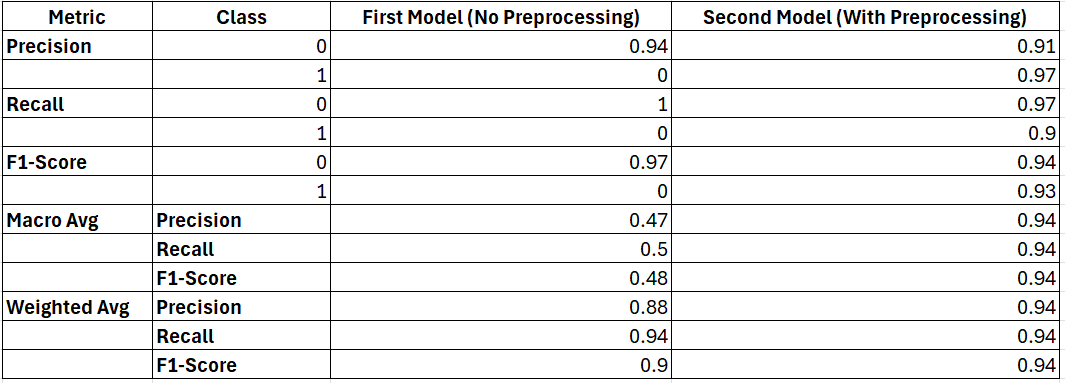

1. Accuracy

- First Model (No Preprocessing): 0.9355
- Second Model (With Preprocessing): 0.9367

While both models exhibit similar accuracy (~93.5%), the second model with preprocessing achieves a slightly better accuracy score of 0.9367, suggesting that the preprocessing steps improve the model's overall performance, even if marginally.

2. Precision, Recall, and F1-Score

- Precision:

The first model shows 0.94 precision for class 0, but 0.00 precision for class 1, meaning that the model fails to predict class 1 instances correctly.

The second model significantly improves the precision for class 1, reaching 0.97, indicating that the model now effectively identifies class 1.

- Recall:

The first model achieves 1.00 recall for class 0, meaning it correctly identifies all class 0 instances. However, it has 0.00 recall for class 1, meaning it completely misses class 1 predictions.

The second model balances recall across both classes, achieving 0.97 for class 0 and 0.90 for class 1, showing a major improvement for class 1 predictions.

- F1-Score:

The F1-score for class 1 in the first model is 0.00, showing that it is ineffective at predicting class 1.

In the second model, the F1-score for class 1 is 0.93, indicating much better performance, with a balanced F1-score of 0.94 for class 0.

3. Macro Average & Weighted Average

Metric	Average Type	First Model (No Preprocessing)	Second Model (With Preprocessing)

The first model's macro averages for precision, recall, and F1-score are around 0.47-0.50, showing that its performance is poor for the minority class (class 1).

The second model dramatically improves all macro averages to 0.94, showing a much better balance between the two classes.

Weighted Average:

The weighted averages also show improvement in the second model, where precision, recall, and F1-score all reach 0.94. The first model performs well for class 0 but fails for class 1, leading to lower weighted scores.

4. Class Imbalance and Impact

First Model: Due to the class imbalance (majority class 0 and minority class 1), the first model fails to identify the minority class (class 1). It achieves 0.00 precision, recall, and F1-score for class 1.

Second Model: The application of SMOTE (oversampling) and RandomUnderSampler during preprocessing helped to balance the dataset. This improved the model’s performance for class 1, resulting in more accurate predictions for both classes.


#Conclusion

The second model, which includes preprocessing steps like SMOTE, undersampling, and scaling, performs significantly better for class 1, particularly in terms of precision, recall, and F1-score.
The first model completely fails to predict class 1, as shown by the 0.00 scores across all metrics for class 1, making it unsuitable for imbalanced datasets.
Overall, the preprocessing steps have clearly led to a more balanced model, capable of handling both classes effectively. The slight improvement in accuracy combined with the significant gains in class 1 metrics (recall, precision, and F1-score) makes the second model more robust and reliable.